In [1]:
!pip install -U transformers
!pip install  -U sentencepiece
!pip install -U sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 47.3 MB/s eta 0:00:00


In [2]:
from transformers import pipeline
import pandas as pd

**Text Classification**

In [ ]:
classifier = pipeline('text-classification', model='SamLowe/roberta-base-go_emotions')

text = "wow! we have come across this far"
outputs = classifier(text)
pd.DataFrame(outputs)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,label,score
0,surprise,0.630752


**Named Entity Recognition**

In [ ]:
ner_tagger = pipeline('ner', aggregation_strategy= 'simple', model='ml6team/keyphrase-extraction-kbir-inspec')
# text = "My name is Laxmi Kant. I work for KGP Talkie."
text = "Keyphrase extraction is a technique in text analysis where you extract the\
important keyphrases from a document. Thanks to these keyphrases humans can\
understand the content of a text very quickly and easily without reading it\
completely. "

outputs = ner_tagger(text)
pd.DataFrame(outputs)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,entity_group,score,word,start,end
0,KEY,0.999997,Keyphrase extraction,0,20
1,KEY,0.999992,text analysis,39,52


**Question Answering**

In [ ]:
text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
horror that I had been sent an action figure of Megatron instead!
"""

reader = pipeline('question-answering')
# question = "What was wrong?"
# question = "What i got?"
question = "from where did I placed order?"

outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,score,start,end,answer
0,0.322951,75,96,online store in India


**Summarization**

In [ ]:
summarizer = pipeline('summarization')

outputs = summarizer(text)
outputs

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 142, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[{'summary_text': ' Amazon sent an Optimus Price action figure from your online store in India . Unfortunately when I opened the package, I discovered to horror that I had been sent an action figure of Megatron instead! Amazon.com.com: "I was sent a Megatron action figure instead!"'}]

In [ ]:
outputs[0]['summary_text'][len(text):]

's sent a Megatron action figure instead!"'

**Text Generation**

In [ ]:
from transformers import set_seed
set_seed(0)

In [ ]:
text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
horror that I had been sent an action figure of Megatron instead!
"""

generator = pipeline('text-generation', model = 'gpt2-large')

response = "I am sorry to hear that your order was mixed up"

# prompt =  "user: " + text.replace("\n", " ") + " Customer Service  Response: " + response

prompt = "There was a lion "

outputs = generator(prompt, max_length=128)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
outputs

[{'generated_text': 'There was a lion \xa0with three heads, and there were scorpions in his belly, and two heads, and a dragon with six heads: from that day forth there was no more sun. I know that I shall abide in everlasting chains, and that none of you shall come here to the resurrection of the dead, but with the beasts which were with me. And again, there were sawyers in the vineyard with their saws on; and he looked up from the dead, and saw the dead, and the beast, and the scorpions, and the viper, and two serpents about him. And he'}]

**Translation**

In [ ]:
translator = pipeline(model = 'Helsinki-NLP/opus-mt-en-hi')

outputs = translator(text)

outputs

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'translation_text': 'Mermam, पिछले सप्ताह मैंने भारत में आपके ऑनलाइन स्टोर से एक ऑपिश क्रिया आकृति का आदेश दिया. दुर्भाग्य से जब मैंने पैकेज खोला था, तो मुझे डर हो गया था कि मैं मेगानो की एक कार्यवाही आकृति भेजा गया था!'}]

**Image Classification**

In [3]:
from PIL import Image
import requests

In [ ]:
url = 'https://cdn.psychologytoday.com/sites/default/files/styles/article-inline-half-caption/public/field_blog_entry_images/2021-12/img_1570.jpg?itok=4nWOikbM'

image = Image.open(requests.get(url, stream= True).raw)

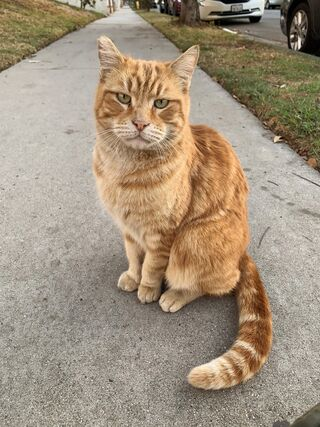

In [ ]:
image

In [ ]:
classifier = pipeline('image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
import numpy as np
outputs = classifier(image)
outputs

[{'label': 'tabby, tabby cat', 'score': 0.38750746846199036},
 {'label': 'tiger cat', 'score': 0.3857225775718689},
 {'label': 'Egyptian cat', 'score': 0.21177519857883453},
 {'label': 'lynx, catamount', 'score': 0.001849623047746718},
 {'label': 'Persian cat', 'score': 0.0007634855573996902}]

In [ ]:
url = 'https://img.freepik.com/free-photo/bearded-man-with-striped-shirt_273609-7180.jpg'

image = Image.open(requests.get(url, stream= True).raw)

In [ ]:
# classifier = pipeline('image-classification', model = 'Rajaram1996/FacialEmoRecog')
classifier = pipeline('image-classification', model = 'nateraw/vit-age-classifier')
outputs = classifier(image)
outputs

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': '30-39', 'score': 0.6378286480903625},
 {'label': '40-49', 'score': 0.17758314311504364},
 {'label': '20-29', 'score': 0.17718195915222168},
 {'label': '50-59', 'score': 0.005685557145625353},
 {'label': '10-19', 'score': 0.0010353729594498873}]

**Image Segmentation**

In [5]:
url = 'https://img.freepik.com/free-photo/bearded-man-with-striped-shirt_273609-7180.jpg'

image = Image.open(requests.get(url, stream= True).raw)

In [6]:
segmenter = pipeline('image-segmentation', model = 'mattmdjaga/segformer_b2_clothes')
outputs = segmenter(image)

outputs

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=626x417>}]

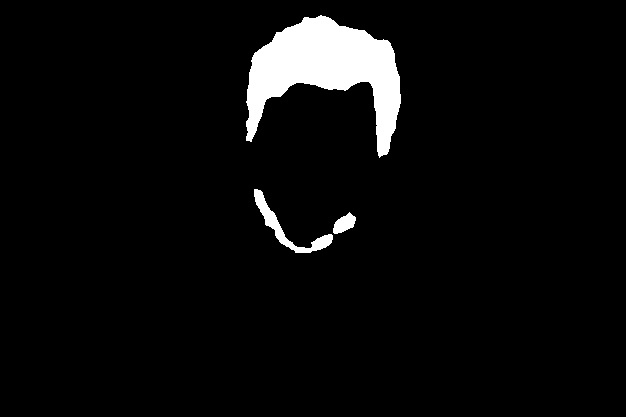

In [11]:
outputs[1]['mask']

**Text to Speech**

In [12]:
import transformers
transformers.__version__

'4.46.1'

In [13]:
import soundfile as sf

In [14]:
text = """
ChatGPT search offers up-to-the-minute sports scores, stock quotes, news, weather and more,
powered by real-time web search and partnerships with news and data providers, according to the company.
"""

In [15]:
synth = pipeline('text-to-speech')

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [16]:
speech = synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [17]:
speech

{'audio': array([[0.00198443, 0.00213475, 0.00272639, ..., 0.00098144, 0.0009983 ,
         0.00094075]], dtype=float32),
 'sampling_rate': 24000}

In [18]:
sf.write("speech.wav", speech['audio'].T, samplerate= speech['sampling_rate'])

**Text to Music Generation**

In [21]:
synth = pipeline('text-to-audio', model = 'facebook/musicgen-small')
# text = 'arabic song with light tempo ready for dancing'
text = 'persian violin with fire dancing'

music = synth(text, forward_params = {"do_sample": True})

/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 5

In [22]:
import scipy
scipy.io.wavfile.write("persian_music.wav", data=music['audio'], rate= music['sampling_rate'])